# Modeling Exercises

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

### a. Choose features other than the ones used in the lesson.

In [1]:
from imports import *

**Getting Iris data**

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**Prepare Isis data**

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**Selecting features**

In [4]:
X = df[['sepal_length', 'sepal_width']]
X.head()

,sepal_length,sepal_width
1,5.1,3.5
2,4.9,3.0
3,4.7,3.2
4,4.6,3.1
5,5.0,3.6


### b. Visualize the results of your clustering.

**Create clusters and fit cluster model**

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

**Add the cluster1 to original dataframe**

In [6]:
df['cluster1'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


**Visualize clusters**

In [7]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster1
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.24
virginica,6.588,2.974,5.552,2.026,1.70


[Text(0.5, 1.0, 'K-Means Clusters')]

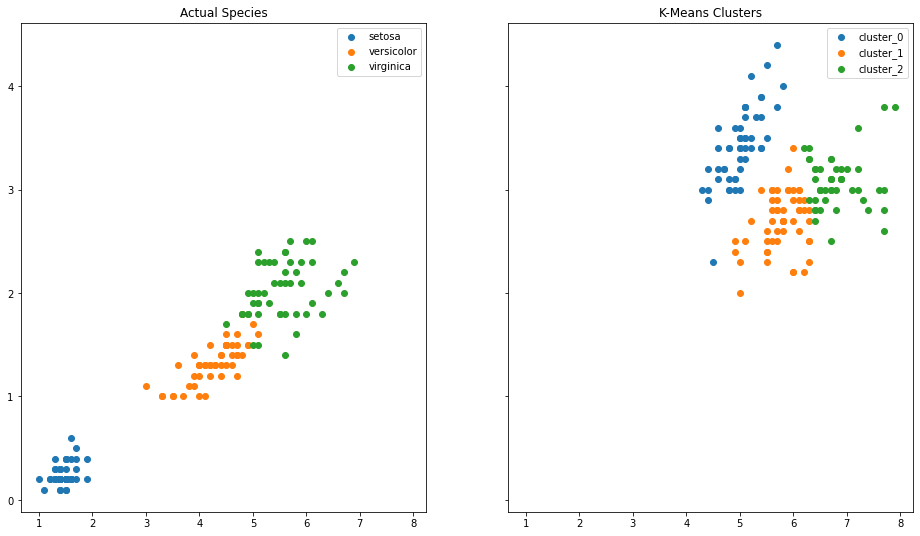

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)
# actual species
for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')

# k-means clusters prediction
for cluster_n in df.cluster1.sort_values().unique():
    axs[1].scatter(df[df.cluster1 == cluster_n].sepal_length, df[df.cluster1 == cluster_n].sepal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### c. Use the elbow method to visually select a good value for k.

**Determine cluster number k**

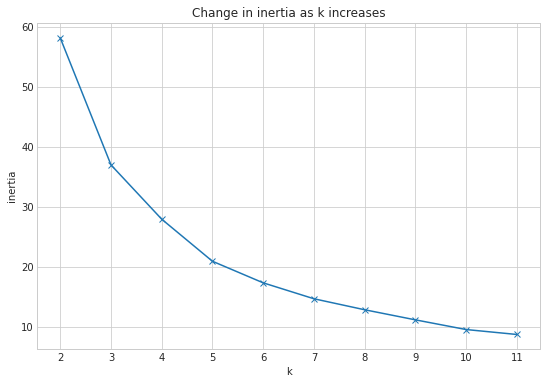

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

This graph seems to show a drop off in inertia around **k==4**

**k==3** is the ideal cluster number

### d. Repeat the clustering, this time with 3 different features.


**Selecting features**

In [10]:
X = df[['sepal_length', 'sepal_width', 'petal_length']]
X.head()

,sepal_length,sepal_width,petal_length
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4


**Create cluster and fit cluster model**

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

**Add cluster2 to original dataframe**

In [12]:
df['cluster2'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1,cluster2
1,5.1,3.5,1.4,0.2,setosa,0,1
2,4.9,3.0,1.4,0.2,setosa,0,1
3,4.7,3.2,1.3,0.2,setosa,0,1
4,4.6,3.1,1.5,0.2,setosa,0,1
5,5.0,3.6,1.4,0.2,setosa,0,1


**Visualize clusters**

[Text(0.5, 1.0, 'K-Means Clusters')]

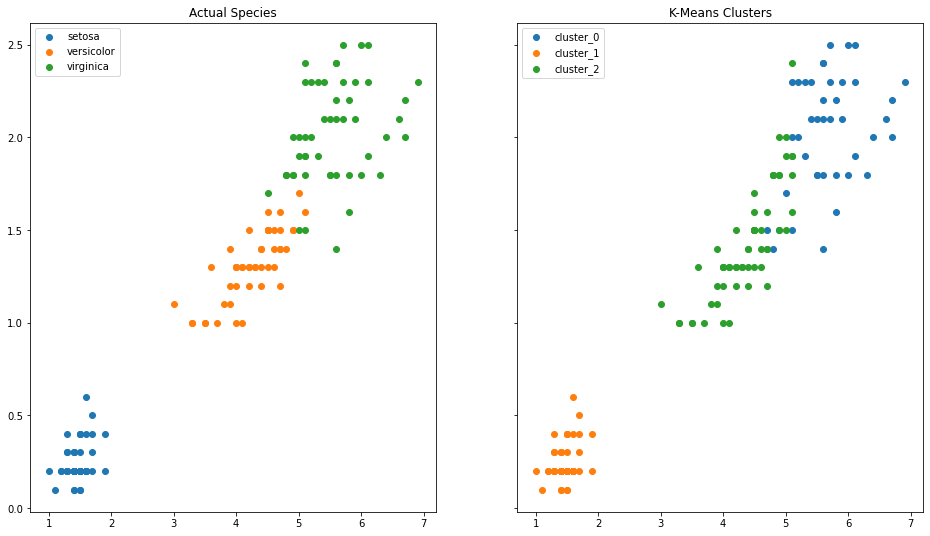

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)
# actual species
for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')

# k-means clusters prediction
for cluster_n in df.cluster2.sort_values().unique():
    axs[1].scatter(df[df.cluster2 == cluster_n].petal_length, df[df.cluster2 == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

**Determine cluster number k**

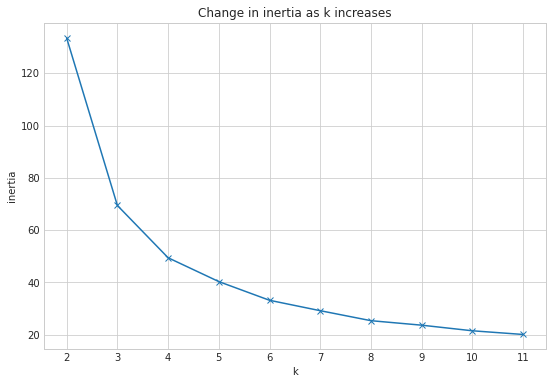

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

This graph seems to show a drop off in inertia around **k==4**

**k==3** is the ideal cluster number

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

**Acquire mall data**

In [15]:
from mall_wrangle import wrangle_mall_df

In [16]:
scaler, train, validate, test = wrangle_mall_df()
train.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0
186,30,99,97,1
114,19,64,46,1


**Let's take a quick look at our data**

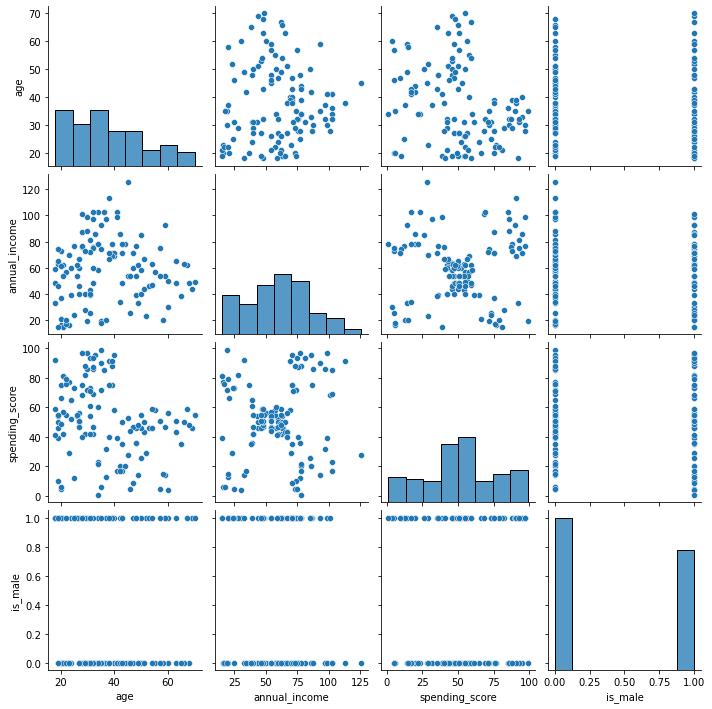

In [17]:
sns.pairplot(train)

**Select features**

In [18]:
X = train[['age', 'annual_income']]
X.head()

,age,annual_income
customer_id,,
182,32,97
49,29,40
35,49,33
186,30,99
114,19,64


**Create cluster model and fit model**

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([3, 1, 4, 3, 2, 4, 3, 3, 1, 1, 1, 0, 2, 1, 0, 1, 0, 2, 3, 1, 1, 4,
       3, 4, 2, 4, 1, 2, 1, 4, 0, 1, 2, 0, 4, 2, 4, 3, 0, 1, 4, 0, 0, 4,
       2, 4, 4, 3, 2, 1, 1, 3, 0, 2, 0, 3, 4, 1, 0, 2, 4, 0, 0, 1, 0, 4,
       4, 0, 3, 4, 0, 3, 1, 4, 2, 0, 0, 0, 2, 4, 4, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 4, 0, 2, 1, 2, 0, 1, 4, 1, 4, 4, 0, 0, 4, 0, 3, 4, 2,
       2, 0, 0, 4, 0, 0, 0, 2], dtype=int32)

**Add cluster1 to original dataframe**

In [22]:
train['cluster1'] = clusters
train.head()

,age,annual_income,spending_score,is_male,cluster1
customer_id,,,,,
182,32,97,86,0,3
49,29,40,42,0,1
35,49,33,14,0,4
186,30,99,97,1,3
114,19,64,46,1,2


**Visualize clusters**

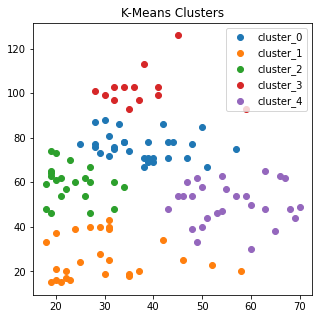

In [27]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster1.sort_values().unique():
    plt.scatter(train[train.cluster1 == cluster_n].age, train[train.cluster1 == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

**Use the elbow method to determine if we have the appropriate number of clusters**

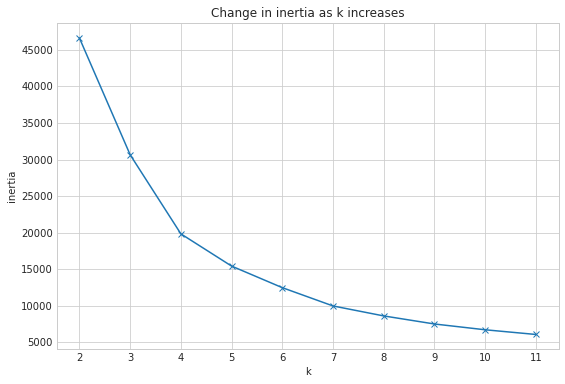

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

This graph seems to show a drop off in inertia around **k==5**

**k==4** is the ideal cluster number

**Create model with k==4**

In [25]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([3, 1, 1, 3, 0, 2, 3, 3, 1, 1, 1, 3, 0, 1, 3, 1, 0, 0, 3, 1, 1, 2,
       3, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 3, 0, 1, 2, 0, 3, 2,
       0, 2, 2, 3, 0, 1, 1, 3, 3, 0, 0, 3, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2,
       2, 0, 3, 2, 0, 3, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 3, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 0, 3, 2, 1,
       0, 0, 0, 2, 0, 2, 0, 1], dtype=int32)

**Add cluster1 to original dataframe**

In [26]:
train['cluster2'] = clusters
train.head()

,age,annual_income,spending_score,is_male,cluster1,cluster2
customer_id,,,,,,
182,32,97,86,0,3,3
49,29,40,42,0,1,1
35,49,33,14,0,4,1
186,30,99,97,1,3,3
114,19,64,46,1,2,0


**Visualize clusters**

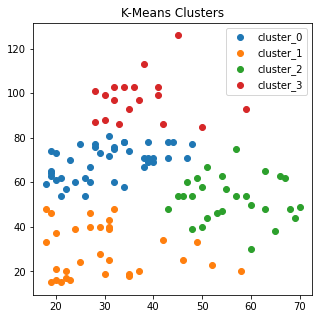

In [28]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster2.sort_values().unique():
    plt.scatter(train[train.cluster2 == cluster_n].age, train[train.cluster2 == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

## 3. How does scaling impact the results of clustering?
Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

